<h1><b><u>Convolution Neural Network<u></b></h1>

- Convolution Neural Network is a type of `deep learning neural network` that excels at working with images and videos.
Unlike other neural networks that require features to be manually defined, CNNs can automatically learn these features through a process called convolution.

Explanation of Convolution Neural Networks(CNNs)
<ol>
<li><b>Layers</b>-  CNNs consist of stacked layers, including an input layer, hidden layers (containing convolutional layers and pooling layers), and an output layer [2, 3].
<li><b>Convolutional Layers</b>-These layers apply filters (or kernels) to the input image, essentially looking for specific patterns or features [2, 4]. As the filter slides across the image, it generates a feature map that gets passed to the next layer [5].
<li><b>Pooling layers</b>-These layers reduce the dimensionality of the data by summarizing the information in a local region of the feature map [3]. This helps control overfitting and makes the network more efficient [4].

#### By processing data through these layers, CNNs can progressively extract higher-level features from the input, going from edges and lines to more complex shapes and objects. This allows them to perform tasks like:
  <ul>
  <li>Image classification: Recognizing what objects are in an image (e.g., cat, car, house) [1].
  <li>Object detection: Identifying and locating specific objects within an image [4].
  <li>Image segmentation: Dividing an image into different segments, each corresponding to a particular object or region [3].

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 56s 115ms/step - loss: 0.3080 - accuracy: 0.9069 - val_loss: 0.0563 - val_accuracy: 0.9824
Epoch 2/10
469/469 [==============================] - 46s 98ms/step - loss: 0.1011 - accuracy: 0.9700 - val_loss: 0.0487 - val_accuracy: 0.9838
Epoch 3/10
469/469 [==============================] - 48s 101ms/step - loss: 0.0734 - accuracy: 0.9785 - val_loss: 0.0365 - val_accuracy: 0.9865
Epoch 4/10
469/469 [==============================] - 46s 97ms/step - loss: 0.0588 - accuracy: 0.9826 - val_loss: 0.0302 - val_accuracy: 0.9894
Epoch 5/10
469/469 [==============================] - 50s 106ms/step - loss: 0.0493 - accuracy: 0.9851 - val_loss: 0.0282 - val_accuracy: 0.9906
Epoch 6/10
469/469 [==============================] - 46s 98ms/step - loss: 0.0447 - accuracy: 0.9863 - val_loss: 0.0259 - val_accuracy: 0.9914
Epoch 7/10
469/469 [==============================] - 47s 101ms/step

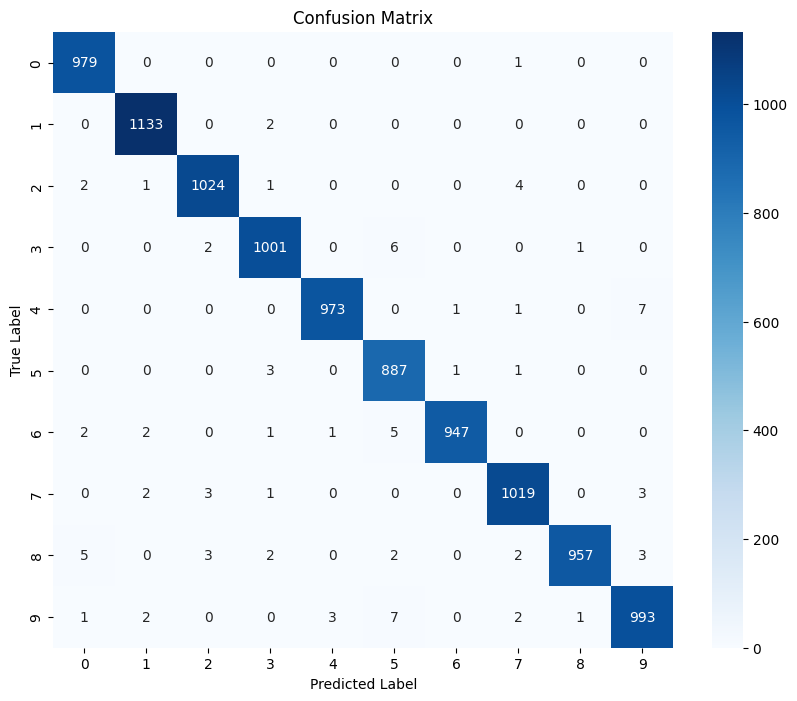

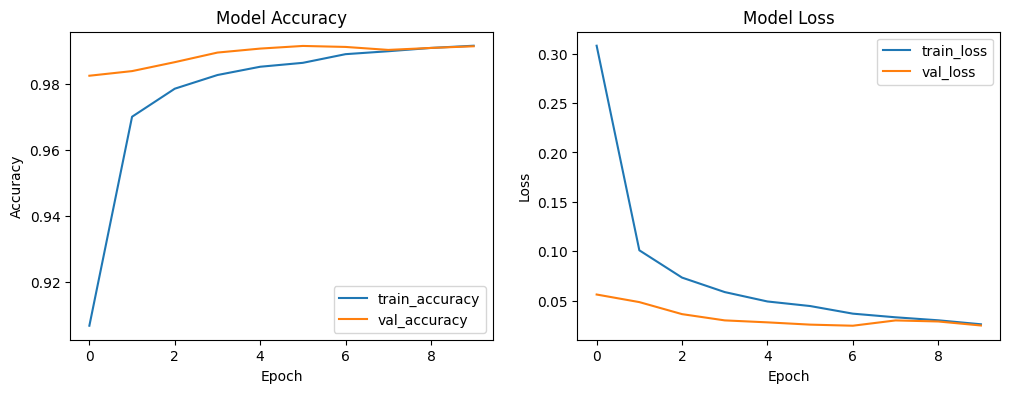

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Step 2: Preprocess the data
# Normalize the images to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the images to (28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Build the CNN model
model = Sequential()

# Add convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(10, activation='softmax'))

# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128, verbose=1)

# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Step 7: Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Step 8: Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Step 9: Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()
